In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pandas as pd
import contextily as ctx


df = pd.read_csv("../data/experiment/all_scenarios.csv")

In [3]:
dbf= gpd.read_file("../data/raw/roads.shp")
frame=pd.read_csv("../data/processed/N1_N2_plus_sideroads.csv")
dbf.head()

,geometry
0,"LINESTRING (90.42258 23.79758, 90.42238 23.798..."
1,"LINESTRING (90.41891 23.79768, 90.42034 23.798..."
2,"LINESTRING (90.41857 23.79918, 90.41941 23.799..."
3,"LINESTRING (90.41926 23.80001, 90.42059 23.800..."
4,"LINESTRING (90.42049 23.80098, 90.42088 23.801..."


<AxesSubplot: >

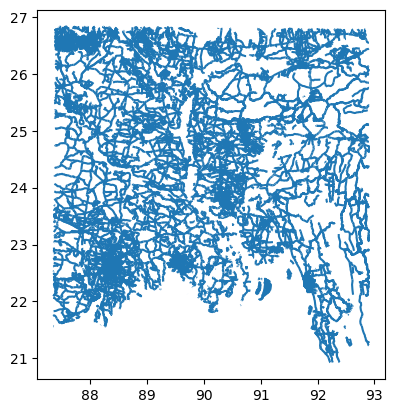

In [4]:
dbf.plot()

In [5]:
frame.head()

,road,id,model_type,condition,name,lat,lon,length,bridge_name
0,N1,1000,sourcesink,NaN,SoSi1,23.706028,90.443333,0.0,NaN
1,N1,1001,link,NaN,NaN,23.702917,90.450417,814.0,NaN
2,N1,1002,link,NaN,NaN,23.702778,90.450472,8.0,NaN
3,N1,1003,link,NaN,NaN,23.702139,90.451972,178.0,NaN
4,N1,1004,bridge,A,NaN,23.698739,90.458861,11.3,bridge at id 1004


In [6]:
latmin=frame['lat'].min()
latmax=frame['lat'].max()
lonmin=frame['lon'].min()
lonmax=frame['lon'].max()
print(latmin)
print(latmax)
print(lonmin)
print(lonmax)


20.8470274
25.1808604
90.381916
92.4850274


In [7]:
from shapely.geometry import Polygon

polyshape = gpd.GeoSeries(Polygon([(lonmin,latmin), (lonmin, latmax), (lonmax, latmax), (lonmax, latmin)]))


In [8]:
polydf = gpd.GeoDataFrame({'geometry': polyshape, 'df1':[1]})

<AxesSubplot: >

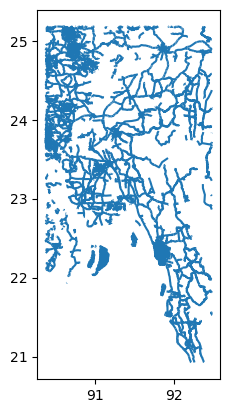

In [9]:
polydf.crs=dbf.crs
clipped_gdf = gpd.clip(dbf, polydf)
clipped_gdf=clipped_gdf['geometry']
clipped_gdf=clipped_gdf.reset_index(drop=True)
clipped_gdf.plot()

In [16]:
print(clipped_gdf.crs is None)
clipped_gdf = clipped_gdf.set_crs('epsg:9678',allow_override=True)
print(clipped_gdf.crs is None)

True
False


HTTPError: Tile URL resulted in a 404 error. Double-check your tile url:
https://stamen-tiles-a.a.ssl.fastly.net/terrain/18/193169/117717.png

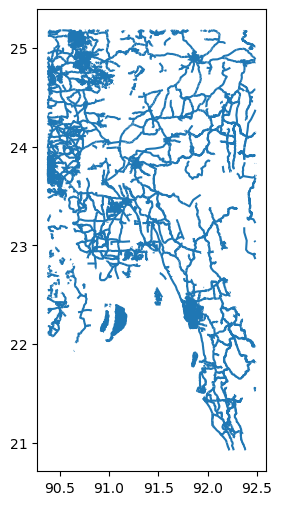

In [17]:
#clipped_gdf.crs=dbf.crs
f, ax = plt.subplots(1, figsize=(6, 6))
clipped_gdf.plot(ax=ax)
ctx.add_basemap(ax=ax, crs=clipped_gdf.crs,zoom=18)
#f.suptitle('Subsection of focus')
plt.axis('equal')
plt.show()
#plt.savefig('Subsection.png')

In [13]:
df_model = pd.read_csv('../data/processed/N1_N2_plus_sideroads.csv')
df_geom= pd.read_csv('../data/processed/points_shapefile_new.csv') 

In [14]:
df_intersect_model = df_model[df_model["model_type"] == "intersection"]

In [15]:
gdf_intersections = gpd.GeoDataFrame(
    df_intersect_model, geometry=gpd.points_from_xy(df_intersect_model.lon, df_intersect_model.lat))

In [16]:
gdf_intersections.head()

,road,id,model_type,condition,name,lat,lon,length,bridge_name,geometry
19,N1,6015,intersection,NaN,NaN,23.930027,90.452583,260.0,NaN,POINT (90.45258 23.93003)
133,N1,1133,intersection,NaN,NaN,23.530805,90.781110,815.0,NaN,POINT (90.78111 23.53080)
157,N1,1157,intersection,NaN,NaN,23.513111,90.870638,42.0,NaN,POINT (90.87064 23.51311)
158,N1,1158,intersection,NaN,NaN,23.512667,90.871416,102.0,NaN,POINT (90.87142 23.51267)
209,N1,1209,intersection,NaN,NaN,23.478972,91.117999,28.0,NaN,POINT (91.11800 23.47897)


<AxesSubplot: >

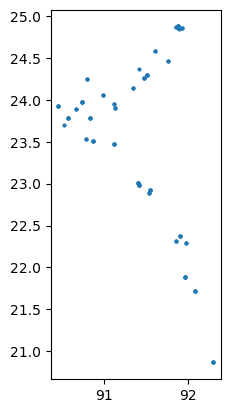

In [17]:
gdf_intersections.plot(markersize=4)

In [18]:
df_geom = df_geom.rename(columns = {'0':'lon', '1':'lat'})

In [19]:
df_geom.head()

,Unnamed: 0,lon,lat
0,0,92.194909,21.002732
1,1,92.266108,21.057847
2,2,92.266603,21.060217
3,3,92.142487,21.077862
4,4,92.197069,21.115806


In [20]:

def count_datatypes(df, col_name):
    dtypes_count = {}
    for index, value in df[col_name].iteritems():
        dtype = type(value)
        if dtype not in dtypes_count:
            dtypes_count[dtype] = 1
        else:
            dtypes_count[dtype] += 1
    return dtypes_count

print(count_datatypes(df_geom,'Unnamed: 0'))
print(count_datatypes(df_geom,'lon'))
print(count_datatypes(df_geom,'lat'))
print(df_geom.shape)

{<class 'int'>: 29146}
{<class 'float'>: 29146}
{<class 'float'>: 29146}
(29146, 3)


C:\Users\nachi\AppData\Local\Temp\ipykernel_5308\1149396249.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df[col_name].iteritems():


In [21]:
gdf_real = gpd.GeoDataFrame(
    df_geom, geometry=gpd.points_from_xy(df_geom.lon, df_geom.lat))

gdf_real.head()

,Unnamed: 0,lon,lat,geometry
0,0,92.194909,21.002732,POINT (92.19491 21.00273)
1,1,92.266108,21.057847,POINT (92.26611 21.05785)
2,2,92.266603,21.060217,POINT (92.26660 21.06022)
3,3,92.142487,21.077862,POINT (92.14249 21.07786)
4,4,92.197069,21.115806,POINT (92.19707 21.11581)


<AxesSubplot: >

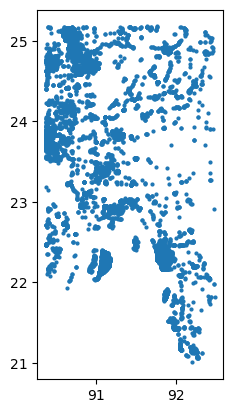

In [22]:
gdf_real.plot(markersize=4)

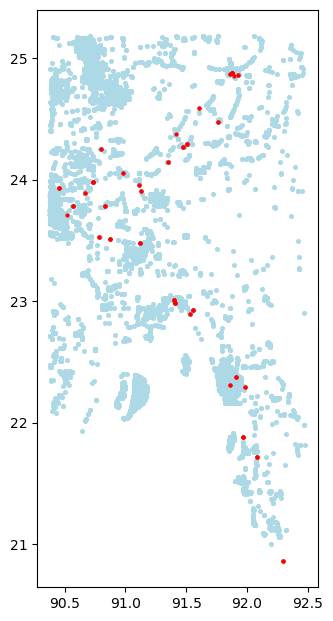

In [23]:
base = gdf_real.plot(color='lightblue', markersize = 7, figsize = (15,7.5))
gdf_intersections.plot(ax=base, marker='o', color='red', markersize=4)
plt.savefig('coincidence.png')

In [24]:
clipped_gdf = gpd.clip(dbf, polydf)
gdf_intersection=gdf_intersections
gdf_intersection.crs=clipped_gdf.crs


In [25]:
temp=gdf_intersection.buffer(0.05)
gdf_overlay=gdf_intersections
gdf_overlay['geometry']=temp

result=gpd.overlay(clipped_gdf, gdf_overlay, how='intersection',keep_geom_type=False)
result

,road,id,model_type,condition,name,lat,lon,length,bridge_name,geometry
0,N1,1950,intersection,NaN,NaN,21.721555,92.083083,163.0,NaN,"LINESTRING (92.07649 21.67205, 92.07651 21.672..."
1,N1,1950,intersection,NaN,NaN,21.721555,92.083083,163.0,NaN,"LINESTRING (92.07725 21.68229, 92.07683 21.681..."
2,N1,1950,intersection,NaN,NaN,21.721555,92.083083,163.0,NaN,"LINESTRING (92.07665 21.68209, 92.07645 21.682..."
3,N1,1950,intersection,NaN,NaN,21.721555,92.083083,163.0,NaN,"LINESTRING (92.07807 21.68142, 92.07794 21.681..."
4,N1,1950,intersection,NaN,NaN,21.721555,92.083083,163.0,NaN,"LINESTRING (92.07450 21.68361, 92.07454 21.683..."
...,...,...,...,...,...,...,...,...,...,...
8836,N2,3679,intersection,NaN,NaN,24.591055,91.601417,189.0,NaN,"LINESTRING (91.60538 24.55257, 91.60497 24.554..."
8837,N2,3679,intersection,NaN,NaN,24.591055,91.601417,189.0,NaN,"LINESTRING (91.60564 24.55122, 91.60538 24.55257)"
8838,R240,3679,intersection,A,NaN,24.591055,91.601417,1.5,NaN,"LINESTRING (91.60450 24.54121, 91.60546 24.546..."
8839,R240,3679,intersection,A,NaN,24.591055,91.601417,1.5,NaN,"LINESTRING (91.60538 24.55257, 91.60497 24.554..."


In [26]:
print(df_intersect_model.shape)
print(len(result.id.unique()))

(87, 10)
44


In [27]:
def count_values(df, column_name):
    """Counts the instances of a particular value in a given column of a Pandas DataFrame and stores it as a dictionary.
    
    Args:
        df (pandas.DataFrame): The DataFrame to count the values in.
        column_name (str): The name of the column to count the values in.
        value (any): The value to count the instances of.
    
    Returns:
        dict: A dictionary where the keys are the unique values in the specified column and the values are the number of instances of the specified value in that column.
    """
    count_dict = {}
    for unique_value in df[column_name].unique():
        count = (df[column_name] == unique_value)
        count_dict[unique_value] = count.sum()
    return count_dict

In [28]:
roadids=pd.DataFrame(result.id.unique())
roadids['count']=0
counts = result.groupby('id').size().reset_index(name='count')

for row in counts.itertuples():
    roadids.loc[roadids[0] == row.id, 'count'] = row.count
     

In [29]:
roadids.head()

,0,count
0,1950,69
1,4900,3
2,4901,3
3,4902,3
4,4903,3


In [30]:
road_sorted = roadids.sort_values(by = "count", ascending=False)
road_sorted.head()

,0,count
5,1663,4654
7,7716,1011
24,5776,656
23,3824,328
21,3811,318


Text(0.5, 1.0, 'Intersections and accuracy')

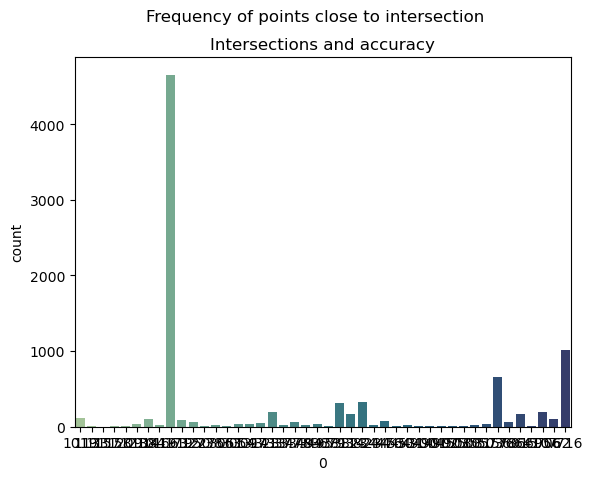

In [31]:
sns.barplot(x=0,y='count', data=road_sorted, palette='crest');
plt.suptitle('Frequency of points close to intersection')
plt.title('Intersections and accuracy')
#plt.savefig('delay_time.png')

C:\Users\nachi\.conda\envs\gds\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


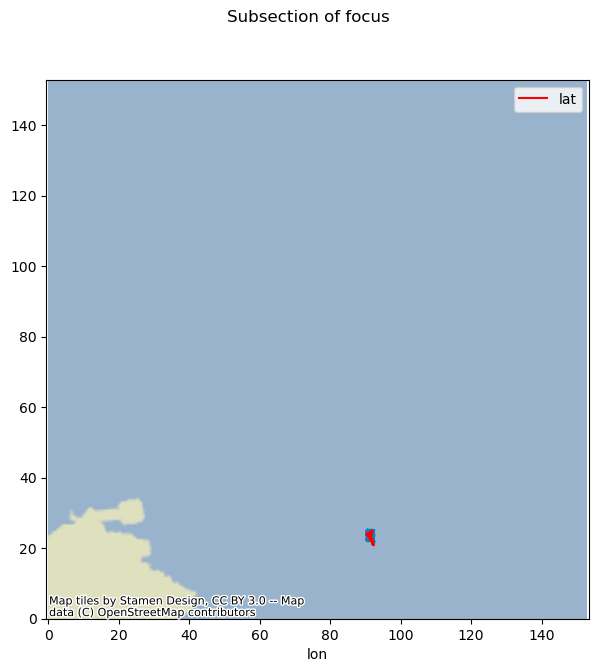

In [32]:
intersections=gdf_intersections.drop(columns=['geometry'])
f, ax = plt.subplots(1, figsize=(7, 7))
clipped_gdf.plot(ax=ax)
intersections.plot(ax=ax, color='red',x='lon',y='lat')
ctx.add_basemap(ax=ax, crs=clipped_gdf.crs)
f.suptitle('Subsection of focus')
plt.axis('equal')
plt.show()